In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
import numpy as np
import math
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords


/usr/local/lib/python3.4/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


### Q1 - Vader and Ground Truth Analysis on Overall, Best and Worst Hotel

In [3]:
#Read in from pandas
hotelDf = pandas.read_csv('/resources/data/niagarafall.csv')
hotelDf.columns=['idNum','filePath','hotelName','reviewColumn','ratingScore','groundTruth']

#Instantiation
sid = SentimentIntensityAnalyzer()

stop = set(stopwords.words('english'))

reviews = hotelDf['reviewColumn'].as_matrix()

#Count the frequency of words
from collections import Counter
import re
counter = Counter()
for review in reviews:
        counter.update([word.lower() for word in re.findall(r'\w+', review) if word.lower() not in stop and len(word) > 2])
        
#Top k word counted by frequency
k = 50
topk = counter.most_common(k)

pdlist = []
#Assign Vader score to individual review using Vader compound score
for rownum, review in enumerate(reviews):
    ss = sid.polarity_scores(review)
    pdlist.append([review]+[ss['compound']])
    if (rownum % 100 == 1):
            print("processed %d reviews" % (rownum+1))
            
reviewDf = pandas.DataFrame(pdlist)
reviewDf.columns = ['reviewCol','vader']

freqReview = []
for i in range(len(reviewDf)):
    tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviewDf['reviewCol'][i])])
    topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
    freqReview.append(topkinReview)

#Prepare freqReviewDf
freqReviewDf = pandas.DataFrame(freqReview)
dfName = []
for c in topk:
    dfName.append(c[0])
freqReviewDf.columns = dfName

finalreviewDf = reviewDf.join(freqReviewDf)

finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)



processed 2 reviews
processed 102 reviews
processed 202 reviews
processed 302 reviews
processed 402 reviews
processed 502 reviews
processed 602 reviews
processed 702 reviews
processed 802 reviews
processed 902 reviews
processed 1002 reviews
processed 1102 reviews
processed 1202 reviews
processed 1302 reviews
processed 1402 reviews
processed 1502 reviews
processed 1602 reviews
processed 1702 reviews
processed 1802 reviews
processed 1902 reviews
processed 2002 reviews
processed 2102 reviews
processed 2202 reviews
processed 2302 reviews
processed 2402 reviews
processed 2502 reviews
processed 2602 reviews
processed 2702 reviews
processed 2802 reviews
processed 2902 reviews
processed 3002 reviews
processed 3102 reviews
processed 3202 reviews
processed 3302 reviews
processed 3402 reviews
processed 3502 reviews
processed 3602 reviews
processed 3702 reviews
processed 3802 reviews
processed 3902 reviews
processed 4002 reviews
processed 4102 reviews
processed 4202 reviews
processed 4302 reviews


In [4]:
#Count the frequency of words
from collections import Counter
import re
counterbest = Counter()
counterworst = Counter()

reviewsbest = hotelDf.loc[hotelDf['hotelName'] == 'The Rex Motel']['reviewColumn'].as_matrix()
reviewsworst = hotelDf.loc[hotelDf['hotelName'] == 'Rainbow Motor Inn']['reviewColumn'].as_matrix()
for review in reviewsbest:
        counterbest.update([word.lower() for word in re.findall(r'\w+', review) if word.lower() not in stop and len(word) > 2])
for review in reviewsworst:
        counterworst.update([word.lower() for word in re.findall(r'\w+', review) if word.lower() not in stop and len(word) > 2])


#Top k word counted by frequency
k = 50
topkbest = counterbest.most_common(k)
topkworst = counterworst.most_common(k)


In [29]:
topkbest

[('room', 1224),
 ('motel', 738),
 ('falls', 624),
 ('clean', 528),
 ('stay', 513),
 ('rooms', 471),
 ('place', 381),
 ('rex', 380),
 ('great', 327),
 ('would', 324),
 ('niagara', 321),
 ('stayed', 265),
 ('owners', 257),
 ('one', 229),
 ('nice', 226),
 ('see', 223),
 ('owner', 219),
 ('comfortable', 215),
 ('area', 201),
 ('night', 197),
 ('good', 195),
 ('hotel', 190),
 ('parking', 189),
 ('small', 188),
 ('bed', 187),
 ('like', 182),
 ('family', 180),
 ('helpful', 180),
 ('little', 180),
 ('decorated', 175),
 ('friendly', 169),
 ('free', 164),
 ('well', 150),
 ('really', 143),
 ('tips', 142),
 ('back', 142),
 ('even', 139),
 ('price', 137),
 ('time', 136),
 ('drive', 135),
 ('day', 133),
 ('reviews', 132),
 ('recommend', 131),
 ('also', 129),
 ('definitely', 128),
 ('could', 124),
 ('get', 122),
 ('two', 121),
 ('pastries', 121),
 ('tip', 119)]

In [5]:
#Extract a list of hotels
hotelNames = finaldf['hotelName'].unique()

hotelRating = []
for hotel in hotelNames:
    itemDf = finaldf.loc[finaldf['hotelName']==hotel]
    hotelRating.append([hotel,itemDf['ratingScore'].mean()])
hotelRatingDfGt = pandas.DataFrame(hotelRating)
hotelRatingDfGt.columns=['hotelName','avgRatingScore']
hotelRatingDfGt

,hotelName,avgRatingScore
0,E-Lodge Near the Falls,3.458333
1,Rainbow Bed and Breakfast,4.470588
2,River Rapids Inn,3.571429
3,Crowne Plaza Niagara Falls - Fallsview,3.719868
4,Rainbow Motor Inn,1.559322
5,Avenue Inn,1.636364
6,AAAA Royal Motel,2.000000
7,Bonanza Motel,2.666667
8,Cavalier Motel,1.944444
9,Alpine Motel,2.000000


In [6]:
#Rank the hotel by ground truth rating score

hotelRatingDfGt.sort_values('avgRatingScore',ascending=0).head(5)

,hotelName,avgRatingScore
24,The Rex Motel,4.625392
1,Rainbow Bed and Breakfast,4.470588
12,Parkway Motel,4.312500
27,Niagara Falls Marriott Fallsview Hotel &amp; Spa,4.232162
41,Rodeway Inn Fallsview,4.184758


In [7]:
hotelRatingDfGt.sort_values('avgRatingScore',ascending=True).head(5)

,hotelName,avgRatingScore
4,Rainbow Motor Inn,1.559322
5,Avenue Inn,1.636364
37,Niagara Lodge &amp; Suites,1.700581
43,Admiral Inn by the Falls,1.781690
8,Cavalier Motel,1.944444


In [8]:
#Rank the hotel by vader coumpound score
hotelRating = []
for hotel in hotelNames:
    itemDf = finaldf.loc[finaldf['hotelName']==hotel]
    hotelRating.append([hotel,itemDf['vader'].mean()])
hotelRatingDfVd = pandas.DataFrame(hotelRating)
hotelRatingDfVd.columns=['hotelName','avgVaderScore']
hotelRatingDfVd

,hotelName,avgVaderScore
0,E-Lodge Near the Falls,0.614417
1,Rainbow Bed and Breakfast,0.903309
2,River Rapids Inn,0.619907
3,Crowne Plaza Niagara Falls - Fallsview,0.714753
4,Rainbow Motor Inn,-0.074722
5,Avenue Inn,-0.226685
6,AAAA Royal Motel,0.738850
7,Bonanza Motel,-0.007250
8,Cavalier Motel,-0.298311
9,Alpine Motel,0.156500


In [9]:
hotelRatingDfVd.sort_values('avgVaderScore',ascending=0).head(5)

,hotelName,avgVaderScore
13,Pilgrim Motor Inn,0.957100
24,The Rex Motel,0.934576
1,Rainbow Bed and Breakfast,0.903309
12,Parkway Motel,0.862094
15,Space Motel,0.847006


In [10]:
#Rank the hotel by vader coumpound score
hotelRating = []
for hotel in hotelNames:
    itemDf = finaldf.loc[finaldf['hotelName']==hotel]
    hotelRating.append([hotel,itemDf['vader'].mean()])
hotelRatingDfVd = pandas.DataFrame(hotelRating)
hotelRatingDfVd.columns=['hotelName','avgVaderScore']
hotelRatingDfVd.sort_values('avgVaderScore',ascending=True).head(5)

,hotelName,avgVaderScore
8,Cavalier Motel,-0.298311
5,Avenue Inn,-0.226685
4,Rainbow Motor Inn,-0.074722
37,Niagara Lodge &amp; Suites,-0.068647
43,Admiral Inn by the Falls,-0.047346


### Q2 - Finding most freq words when scores are positive vs. negative

In [11]:
itemAnalysisDf = finaldf[['reviewCol','groundTruth','vader']]

stop.add('hotel')
stop.add('room')
stop.add('rooms')
stop.add('stay')
stop.add('staff')

In [12]:
from collections import Counter
import re
#To find out the most frequent word in review when the ground truth is positive
counter = Counter()
for review in itemAnalysisDf.loc[itemAnalysisDf['groundTruth']=='positive']['reviewCol']:
        counter.update([word.lower() for word in re.findall(r'\w+', review) if word.lower() not in stop and len(word) > 2])
        
k=50
topkPos = counter.most_common(k)
topkPos

[('falls', 35758),
 ('view', 21623),
 ('great', 17126),
 ('clean', 12046),
 ('would', 11433),
 ('see', 11222),
 ('nice', 10454),
 ('good', 10431),
 ('niagara', 9550),
 ('floor', 9356),
 ('one', 9233),
 ('parking', 8909),
 ('night', 8805),
 ('stayed', 8706),
 ('breakfast', 8359),
 ('get', 7873),
 ('tip', 7435),
 ('also', 7145),
 ('tips', 7142),
 ('location', 7124),
 ('friendly', 6925),
 ('time', 6686),
 ('well', 6506),
 ('walk', 6457),
 ('area', 6432),
 ('service', 6102),
 ('pool', 5708),
 ('comfortable', 5706),
 ('day', 5703),
 ('fallsview', 5409),
 ('check', 5373),
 ('could', 5335),
 ('restaurant', 5235),
 ('casino', 5198),
 ('free', 5171),
 ('two', 5153),
 ('really', 4823),
 ('helpful', 4811),
 ('back', 4797),
 ('front', 4526),
 ('right', 4495),
 ('best', 4447),
 ('bed', 4438),
 ('desk', 4413),
 ('like', 4328),
 ('place', 4250),
 ('food', 4107),
 ('recommend', 4092),
 ('everything', 4056),
 ('got', 4036)]

In [13]:
from collections import Counter
import re
counter = Counter()
#To find out the most frequent word in review when the ground truth is negative
for review in itemAnalysisDf.loc[itemAnalysisDf['groundTruth']=='negative']['reviewCol']:
        counter.update([word.lower() for word in re.findall(r'\w+', review) if word.lower() not in stop and len(word) > 2])

k=50
topkNeg = counter.most_common(k)
topkNeg

[('falls', 9128),
 ('would', 7442),
 ('one', 6182),
 ('view', 6102),
 ('night', 5900),
 ('parking', 5473),
 ('get', 5170),
 ('good', 4840),
 ('see', 4413),
 ('desk', 4078),
 ('stayed', 3935),
 ('clean', 3933),
 ('could', 3931),
 ('like', 3906),
 ('floor', 3881),
 ('nice', 3840),
 ('front', 3779),
 ('time', 3667),
 ('great', 3547),
 ('check', 3398),
 ('also', 3377),
 ('breakfast', 3336),
 ('even', 3316),
 ('back', 3247),
 ('told', 3147),
 ('day', 3132),
 ('bed', 3126),
 ('niagara', 3028),
 ('got', 2971),
 ('location', 2932),
 ('service', 2884),
 ('pool', 2810),
 ('two', 2726),
 ('place', 2687),
 ('tip', 2636),
 ('booked', 2587),
 ('area', 2540),
 ('bathroom', 2501),
 ('tips', 2446),
 ('price', 2421),
 ('went', 2401),
 ('said', 2326),
 ('next', 2320),
 ('never', 2295),
 ('first', 2287),
 ('really', 2261),
 ('people', 2247),
 ('well', 2245),
 ('free', 2184),
 ('much', 2159)]

In [14]:
from collections import Counter
import re
counter = Counter()
#To find out the most frequent word in review when the vader score is positive
for review in itemAnalysisDf.loc[itemAnalysisDf['vader']>0]['reviewCol']:
        counter.update([word.lower() for word in re.findall(r'\w+', review) if word.lower() not in stop and len(word) > 2])
k=50
topk1 = counter.most_common(k)
topk1

[('falls', 42610),
 ('view', 26104),
 ('great', 20151),
 ('would', 16521),
 ('clean', 15192),
 ('good', 14342),
 ('see', 14274),
 ('nice', 13602),
 ('one', 13291),
 ('parking', 12778),
 ('night', 12760),
 ('floor', 12055),
 ('niagara', 11750),
 ('stayed', 11406),
 ('get', 11383),
 ('breakfast', 10815),
 ('also', 9546),
 ('location', 9488),
 ('tip', 9247),
 ('time', 9178),
 ('tips', 8805),
 ('area', 8349),
 ('friendly', 8340),
 ('well', 8231),
 ('walk', 7988),
 ('service', 7987),
 ('could', 7901),
 ('day', 7812),
 ('pool', 7750),
 ('check', 7652),
 ('like', 7053),
 ('desk', 7020),
 ('two', 7006),
 ('free', 6968),
 ('front', 6929),
 ('comfortable', 6826),
 ('back', 6784),
 ('fallsview', 6642),
 ('restaurant', 6595),
 ('casino', 6561),
 ('bed', 6497),
 ('really', 6424),
 ('even', 6028),
 ('place', 6009),
 ('got', 5952),
 ('right', 5680),
 ('best', 5635),
 ('helpful', 5601),
 ('price', 5483),
 ('food', 5161)]

In [15]:
from collections import Counter
import re
counter = Counter()
#To find out the most frequent word in review when the vader score is negative
for review in itemAnalysisDf.loc[itemAnalysisDf['vader']<0]['reviewCol']:
        counter.update([word.lower() for word in re.findall(r'\w+', review) if word.lower() not in stop and len(word) > 2])
k=50
topk2 = counter.most_common(k)
topk2

[('would', 2338),
 ('falls', 2237),
 ('one', 2104),
 ('night', 1917),
 ('get', 1655),
 ('view', 1604),
 ('parking', 1585),
 ('desk', 1468),
 ('front', 1371),
 ('see', 1355),
 ('could', 1353),
 ('told', 1341),
 ('even', 1298),
 ('back', 1256),
 ('stayed', 1217),
 ('like', 1178),
 ('floor', 1172),
 ('time', 1163),
 ('check', 1112),
 ('bed', 1054),
 ('got', 1047),
 ('never', 1038),
 ('booked', 1021),
 ('day', 1015),
 ('service', 997),
 ('said', 990),
 ('also', 974),
 ('went', 950),
 ('good', 926),
 ('place', 920),
 ('dirty', 878),
 ('breakfast', 870),
 ('two', 866),
 ('asked', 838),
 ('bathroom', 836),
 ('tip', 820),
 ('niagara', 819),
 ('first', 806),
 ('clean', 783),
 ('people', 780),
 ('tips', 779),
 ('pool', 762),
 ('door', 744),
 ('next', 742),
 ('another', 719),
 ('water', 717),
 ('manager', 712),
 ('called', 700),
 ('old', 693),
 ('nice', 687)]

## Q2B - Rex Motel is the top rated hotel, Rainbow is the worst rated

In [16]:
from collections import Counter
import re
#To find out the most frequent word in review when the ground truth is positive
counter = Counter()
for review in finaldf.loc[finaldf['hotelName'] == 'The Rex Motel'].loc[finaldf['groundTruth'] == 'positive']['reviewCol']:
    counter.update([word.lower() for word in re.findall(r'\w+', review) if word.lower() not in stop and len(word) > 2])
        
k=50
topkPos = counter.most_common(k)
topkPos

[('motel', 699),
 ('falls', 602),
 ('clean', 498),
 ('rex', 367),
 ('place', 360),
 ('great', 317),
 ('niagara', 304),
 ('would', 292),
 ('stayed', 251),
 ('owners', 244),
 ('see', 214),
 ('owner', 212),
 ('nice', 211),
 ('one', 210),
 ('comfortable', 208),
 ('area', 192),
 ('good', 184),
 ('night', 182),
 ('bed', 176),
 ('helpful', 175),
 ('little', 173),
 ('parking', 171),
 ('family', 171),
 ('decorated', 171),
 ('small', 168),
 ('like', 166),
 ('friendly', 157),
 ('free', 152),
 ('really', 139),
 ('well', 139),
 ('tips', 138),
 ('back', 136),
 ('time', 134),
 ('even', 129),
 ('price', 129),
 ('drive', 129),
 ('day', 127),
 ('recommend', 126),
 ('definitely', 122),
 ('reviews', 121),
 ('pastries', 116),
 ('could', 115),
 ('tip', 115),
 ('also', 114),
 ('get', 112),
 ('made', 111),
 ('two', 110),
 ('away', 106),
 ('location', 97),
 ('close', 97)]

In [17]:
from collections import Counter
import re
#To find out the most frequent word in review when the ground truth is negative
counter = Counter()
for review in finaldf.loc[finaldf['hotelName'] == 'The Rex Motel'].loc[finaldf['groundTruth'] == 'negative']['reviewCol']:
    counter.update([word.lower() for word in re.findall(r'\w+', review) if word.lower() not in stop and len(word) > 2])
        

k=50
topkNeg = counter.most_common(k)
topkNeg

[('motel', 39),
 ('would', 32),
 ('clean', 30),
 ('falls', 22),
 ('place', 21),
 ('small', 20),
 ('one', 19),
 ('parking', 18),
 ('niagara', 17),
 ('like', 16),
 ('nice', 15),
 ('night', 15),
 ('also', 15),
 ('stayed', 14),
 ('owners', 13),
 ('rex', 13),
 ('free', 12),
 ('friendly', 12),
 ('reviews', 11),
 ('well', 11),
 ('door', 11),
 ('good', 11),
 ('two', 11),
 ('bed', 11),
 ('great', 10),
 ('even', 10),
 ('lot', 10),
 ('location', 10),
 ('get', 10),
 ('breakfast', 10),
 ('noise', 9),
 ('morning', 9),
 ('way', 9),
 ('family', 9),
 ('area', 9),
 ('could', 9),
 ('see', 9),
 ('make', 9),
 ('much', 8),
 ('quite', 8),
 ('space', 8),
 ('something', 8),
 ('better', 8),
 ('trip', 8),
 ('street', 8),
 ('price', 8),
 ('best', 8),
 ('say', 8),
 ('road', 8),
 ('bathroom', 8)]

In [18]:
from collections import Counter
import re
#To find out the most frequent word in review when the vader truth is positive
counter = Counter()
for review in finaldf.loc[finaldf['hotelName'] == 'The Rex Motel'].loc[finaldf['vader']>0]['reviewCol']:
    counter.update([word.lower() for word in re.findall(r'\w+', review) if word.lower() not in stop and len(word) > 2])
        
k=50
topkPos = counter.most_common(k)
topkPos

[('motel', 734),
 ('falls', 623),
 ('clean', 526),
 ('rex', 380),
 ('place', 379),
 ('great', 327),
 ('would', 323),
 ('niagara', 320),
 ('stayed', 262),
 ('owners', 256),
 ('one', 227),
 ('nice', 226),
 ('see', 223),
 ('owner', 218),
 ('comfortable', 215),
 ('area', 201),
 ('night', 195),
 ('good', 194),
 ('parking', 188),
 ('small', 185),
 ('bed', 184),
 ('like', 181),
 ('family', 180),
 ('helpful', 180),
 ('little', 177),
 ('decorated', 173),
 ('friendly', 169),
 ('free', 164),
 ('well', 150),
 ('really', 143),
 ('tips', 142),
 ('back', 142),
 ('even', 139),
 ('price', 137),
 ('time', 136),
 ('day', 133),
 ('drive', 133),
 ('recommend', 130),
 ('reviews', 129),
 ('also', 127),
 ('definitely', 127),
 ('two', 121),
 ('pastries', 120),
 ('could', 119),
 ('tip', 119),
 ('get', 119),
 ('made', 117),
 ('away', 111),
 ('location', 107),
 ('make', 103)]

In [19]:
from collections import Counter
import re
#To find out the most frequent word in review when the vader score is negative
counter = Counter()
for review in finaldf.loc[finaldf['hotelName'] == 'The Rex Motel'].loc[finaldf['vader']<0]['reviewCol']:
    counter.update([word.lower() for word in re.findall(r'\w+', review) if word.lower() not in stop and len(word) > 2])

k=50
topkNeg = counter.most_common(k)
topkNeg

[('could', 5),
 ('motel', 4),
 ('reviews', 3),
 ('small', 3),
 ('little', 3),
 ('stayed', 3),
 ('run', 3),
 ('get', 3),
 ('bed', 3),
 ('much', 2),
 ('bring', 2),
 ('night', 2),
 ('wait', 2),
 ('hooks', 2),
 ('one', 2),
 ('door', 2),
 ('warm', 2),
 ('decorated', 2),
 ('next', 2),
 ('drive', 2),
 ('place', 2),
 ('times', 2),
 ('nicely', 2),
 ('clean', 2),
 ('also', 2),
 ('morning', 2),
 ('noise', 2),
 ('old', 2),
 ('bathroom', 2),
 ('real', 2),
 ('another', 2),
 ('control', 2),
 ('thinking', 1),
 ('outlets', 1),
 ('upon', 1),
 ('freezing', 1),
 ('cold', 1),
 ('hills', 1),
 ('space', 1),
 ('unfortunately', 1),
 ('occupied', 1),
 ('conditioning', 1),
 ('dispenser', 1),
 ('book', 1),
 ('roll', 1),
 ('acceptable', 1),
 ('groom', 1),
 ('air', 1),
 ('fit', 1),
 ('expected', 1)]

In [20]:
from collections import Counter
import re
#To find out the most frequent word in review when the ground truth is positive
counter = Counter()
for review in finaldf.loc[finaldf['hotelName'] == 'Rainbow Motor Inn'].loc[finaldf['groundTruth'] == 'positive']['reviewCol']:
    counter.update([word.lower() for word in re.findall(r'\w+', review) if word.lower() not in stop and len(word) > 2])
        
k=50
topkPos = counter.most_common(k)
topkPos

[('motel', 6),
 ('place', 6),
 ('falls', 6),
 ('see', 5),
 ('clean', 5),
 ('night', 4),
 ('niagara', 4),
 ('tim', 3),
 ('say', 3),
 ('free', 3),
 ('check', 3),
 ('attractions', 3),
 ('also', 3),
 ('need', 3),
 ('could', 3),
 ('would', 3),
 ('find', 3),
 ('best', 3),
 ('horton', 2),
 ('outdoor', 2),
 ('tip', 2),
 ('200', 2),
 ('one', 2),
 ('door', 2),
 ('blocks', 2),
 ('location', 2),
 ('small', 2),
 ('casino', 2),
 ('next', 2),
 ('area', 2),
 ('cost', 2),
 ('helpful', 2),
 ('outside', 2),
 ('shabby', 2),
 ('running', 2),
 ('good', 2),
 ('coffee', 2),
 ('pool', 2),
 ('little', 2),
 ('water', 2),
 ('bed', 2),
 ('tips', 2),
 ('microwave', 2),
 ('saved', 1),
 ('touch', 1),
 ('weekend', 1),
 ('review', 1),
 ('wooohooo', 1),
 ('calling', 1),
 ('upon', 1)]

In [21]:
from collections import Counter
import re
#To find out the most frequent word in review when the ground truth is negative
counter = Counter()
for review in finaldf.loc[finaldf['hotelName'] == 'Rainbow Motor Inn'].loc[finaldf['groundTruth'] == 'negative']['reviewCol']:
    counter.update([word.lower() for word in re.findall(r'\w+', review) if word.lower() not in stop and len(word) > 2])
        

k=50
topkNeg = counter.most_common(k)
topkNeg

[('place', 48),
 ('get', 30),
 ('would', 28),
 ('bed', 25),
 ('motel', 23),
 ('even', 22),
 ('like', 22),
 ('night', 22),
 ('bathroom', 21),
 ('towels', 20),
 ('see', 20),
 ('tub', 19),
 ('went', 19),
 ('one', 19),
 ('door', 18),
 ('booked', 18),
 ('back', 18),
 ('got', 18),
 ('falls', 18),
 ('stayed', 18),
 ('desk', 17),
 ('phone', 17),
 ('left', 17),
 ('work', 17),
 ('bugs', 17),
 ('could', 17),
 ('shower', 16),
 ('first', 16),
 ('dirty', 16),
 ('said', 15),
 ('walk', 15),
 ('clean', 15),
 ('front', 14),
 ('pool', 14),
 ('floor', 14),
 ('told', 13),
 ('else', 13),
 ('looked', 12),
 ('parking', 12),
 ('pay', 12),
 ('carpet', 12),
 ('away', 12),
 ('right', 12),
 ('time', 12),
 ('two', 12),
 ('paid', 11),
 ('good', 11),
 ('ever', 11),
 ('location', 11),
 ('take', 11)]

In [22]:
from collections import Counter
import re
#To find out the most frequent word in review when the vader score is positive
counter = Counter()
for review in finaldf.loc[finaldf['hotelName'] == 'Rainbow Motor Inn'].loc[finaldf['vader']>0]['reviewCol']:
    counter.update([word.lower() for word in re.findall(r'\w+', review) if word.lower() not in stop and len(word) > 2])
        
k=50
topkPos = counter.most_common(k)
topkPos

[('place', 19),
 ('motel', 17),
 ('one', 14),
 ('falls', 13),
 ('get', 12),
 ('first', 12),
 ('clean', 12),
 ('went', 12),
 ('night', 11),
 ('pool', 11),
 ('would', 11),
 ('bed', 11),
 ('find', 10),
 ('parking', 9),
 ('looking', 9),
 ('back', 9),
 ('told', 9),
 ('niagara', 9),
 ('see', 9),
 ('even', 8),
 ('like', 8),
 ('desk', 8),
 ('else', 8),
 ('free', 8),
 ('good', 8),
 ('could', 8),
 ('also', 8),
 ('check', 8),
 ('left', 7),
 ('door', 7),
 ('towels', 7),
 ('casino', 7),
 ('location', 7),
 ('floor', 7),
 ('pay', 7),
 ('say', 7),
 ('got', 7),
 ('reviews', 6),
 ('nice', 6),
 ('given', 6),
 ('lot', 6),
 ('walk', 6),
 ('experience', 6),
 ('said', 6),
 ('tub', 6),
 ('money', 6),
 ('area', 6),
 ('price', 6),
 ('best', 6),
 ('outside', 6)]

In [23]:
from collections import Counter
import re
#To find out the most frequent word in review when the vader score is negative
counter = Counter()
for review in finaldf.loc[finaldf['hotelName'] == 'Rainbow Motor Inn'].loc[finaldf['vader']<0]['reviewCol']:
    counter.update([word.lower() for word in re.findall(r'\w+', review) if word.lower() not in stop and len(word) > 2])

k=50
topkNeg = counter.most_common(k)
topkNeg

[('place', 35),
 ('would', 20),
 ('get', 19),
 ('see', 16),
 ('bathroom', 16),
 ('bed', 16),
 ('like', 15),
 ('work', 15),
 ('night', 15),
 ('even', 14),
 ('door', 13),
 ('tub', 13),
 ('bugs', 13),
 ('towels', 13),
 ('booked', 13),
 ('phone', 13),
 ('stayed', 13),
 ('motel', 12),
 ('could', 12),
 ('dirty', 12),
 ('got', 11),
 ('falls', 11),
 ('shower', 11),
 ('looked', 10),
 ('walk', 10),
 ('left', 10),
 ('desk', 10),
 ('back', 10),
 ('front', 10),
 ('next', 9),
 ('carpet', 9),
 ('said', 9),
 ('water', 9),
 ('filthy', 9),
 ('toilet', 8),
 ('went', 8),
 ('paid', 8),
 ('bad', 8),
 ('floor', 8),
 ('clean', 8),
 ('ever', 8),
 ('two', 8),
 ('away', 7),
 ('around', 7),
 ('right', 7),
 ('worst', 7),
 ('time', 7),
 ('old', 7),
 ('one', 7),
 ('far', 7)]

## Q3 - Mutual Information

In [25]:
gtScore = []
for i in range(len(finaldf)):
    if finaldf['ratingScore'][i]>3:
        gtScore.append(1)
    else:
        gtScore.append(0)
        
#Calculate muual information score using scikit lean package
import sklearn
import sklearn.metrics as metrics
miScore = []
for word in topk:
    miScore.append([word[0]]+[metrics.mutual_info_score(gtScore,finaldf[word[0]].as_matrix())])
miScoredf = pandas.DataFrame(miScore).sort_values(1,ascending=0)
miScoredf.columns = ['Word','MI Score']
miScoredf.head(50)

,Word,MI Score
2,falls,0.026451
4,great,0.023261
3,view,0.018706
32,friendly,0.010669
37,like,0.009674
9,clean,0.009348
46,comfortable,0.009054
7,staff,0.007470
34,desk,0.006813
42,even,0.005704


In [83]:
gtScore = []
for i in range(len(finaldf)):
    if finaldf['vader'][i]>0:
        gtScore.append(1)
    else:
        gtScore.append(0)
        
#Calculate muual information score using scikit lean package
import sklearn
import sklearn.metrics as metrics
miScore = []
for word in topk:
    miScore.append([word[0]]+[metrics.mutual_info_score(gtScore,finaldf[word[0]].as_matrix())])
miScoredf = pandas.DataFrame(miScore).sort_values(1,ascending=0)
miScoredf.columns = ['Word','MI Score']
miScoredf.head(50)

,Word,MI Score
4,great,0.025091
2,falls,0.020712
9,clean,0.014727
32,friendly,0.013215
3,view,0.011384
46,comfortable,0.010250
15,nice,0.007813
7,staff,0.007027
24,location,0.006142
12,good,0.004872


## Q3B - MI for Rex Motel and Rainbow

In [135]:
#Obtain finaldf again for PMI, it should be same as the finaldf before. But just tobe safe, we retrieve it again
freqReview = []
for i in range(len(reviewDf)):
    tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviewDf['reviewCol'][i])])
    topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topkbest]
    freqReview.append(topkinReview)
freqReviewDf = pandas.DataFrame(freqReview)
dfName = []
for c in topkbest:
    dfName.append(c[0])
freqReviewDf.columns = dfName
finalreviewDf = reviewDf.join(freqReviewDf)
finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)

In [136]:
gtScore = []

for i in finaldf.loc[finaldf['hotelName'] == 'The Rex Motel']['ratingScore'].as_matrix():
    if i>3:
        gtScore.append(1)
        
    else:
        gtScore.append(0)
       
        
#Calculate muual information score using scikit lean package
import sklearn
import sklearn.metrics as metrics

miScore = []
for i,word in enumerate(topkbest):
    miScore.append([word[0]]+[metrics.mutual_info_score(gtScore,finaldf.loc[finaldf['hotelName'] == 'The Rex Motel'][word[0]].as_matrix())])
miScoredf = pandas.DataFrame(miScore).sort_values(1,ascending=0)
miScoredf.columns = ['Word','MI Score']
miScoredf.head(50)

,Word,MI Score
4,rex,5.599042e-03
5,great,4.566884e-03
25,decorated,4.457581e-03
44,pastries,4.343154e-03
34,time,4.095230e-03
23,helpful,3.934575e-03
14,comfortable,3.521581e-03
19,small,3.069581e-03
30,tips,2.746651e-03
13,owner,2.630058e-03


In [137]:
gtScore = []
u = 5221
for i in range(len(finaldf.loc[finaldf['hotelName'] == 'The Rex Motel'])):
    if finaldf.loc[finaldf['hotelName'] == 'The Rex Motel']['vader'][u]>0:
        gtScore.append(1)
        u += 1
    else:
        gtScore.append(0)
        u += 1
        
#Calculate muual information score using scikit lean package
import sklearn
import sklearn.metrics as metrics
miScore = []
for i,word in enumerate(topkbest):
    miScore.append([word[0]]+[metrics.mutual_info_score(gtScore,finaldf.loc[finaldf['hotelName'] == 'The Rex Motel'][word[0]].as_matrix())])
miScoredf = pandas.DataFrame(miScore).sort_values(1,ascending=0)
miScoredf.columns = ['Word','MI Score']
miScoredf.head(50)
    

,Word,MI Score
42,get,5.508565e-03
41,could,5.333083e-03
4,rex,3.312073e-03
5,great,2.783284e-03
14,comfortable,2.267276e-03
12,see,2.210919e-03
8,stayed,2.087823e-03
11,nice,2.072205e-03
23,helpful,2.058501e-03
26,friendly,1.883021e-03


In [142]:
#Obtain finaldf again for PMI, it should be same as the finaldf before. But just tobe safe, we retrieve it again
freqReview = []
for i in range(len(reviewDf)):
    tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviewDf['reviewCol'][i])])
    topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topkworst]
    freqReview.append(topkinReview)
freqReviewDf = pandas.DataFrame(freqReview)
dfName = []
for c in topkworst:
    dfName.append(c[0])
freqReviewDf.columns = dfName
finalreviewDf = reviewDf.join(freqReviewDf)
finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)

In [143]:
gtScore = []
u = 1582
for i in range(len(finaldf.loc[finaldf['hotelName'] == 'Rainbow Motor Inn'])):
    if finaldf.loc[finaldf['hotelName'] == 'Rainbow Motor Inn']['ratingScore'][u]>3:
        gtScore.append(1)
        u += 1
    else:
        gtScore.append(0)
        u += 1
        
#Calculate muual information score using scikit lean package
import sklearn
import sklearn.metrics as metrics
miScore = []
for i,word in enumerate(topkworst):
    miScore.append([word[0]]+[metrics.mutual_info_score(gtScore,finaldf.loc[finaldf['hotelName'] == 'Rainbow Motor Inn'][word[0]].as_matrix())])
miScoredf = pandas.DataFrame(miScore).sort_values(1,ascending=0)
miScoredf.columns = ['Word','MI Score']
miScoredf.head(50)
    

,Word,MI Score
7,falls,0.048922
9,even,0.030363
14,towels,0.028241
3,motel,0.025092
17,tub,0.024151
24,left,0.024151
22,booked,0.024151
23,got,0.024151
31,dirty,0.022178
40,told,0.020250


In [144]:
gtScore = []
u = 1582
for i in range(len(finaldf.loc[finaldf['hotelName'] == 'Rainbow Motor Inn'])):
    if finaldf.loc[finaldf['hotelName'] == 'Rainbow Motor Inn']['vader'][u]>0:
        gtScore.append(1)
        u += 1
    else:
        gtScore.append(0)
        u += 1
        
#Calculate muual information score using scikit lean package
import sklearn
import sklearn.metrics as metrics
miScore = []
for i,word in enumerate(topkworst):
    miScore.append([word[0]]+[metrics.mutual_info_score(gtScore,finaldf.loc[finaldf['hotelName'] == 'Rainbow Motor Inn'][word[0]].as_matrix())])
miScoredf = pandas.DataFrame(miScore).sort_values(1,ascending=0)
miScoredf.columns = ['Word','MI Score']
miScoredf.head(50)

,Word,MI Score
0,place,0.039921
39,find,0.038626
40,told,0.026485
42,looked,0.025787
25,work,0.025787
45,carpet,0.019731
36,parking,0.018648
15,clean,0.017828
11,one,0.017828
37,good,0.017753


## Q4 - PMI

In [58]:
#Obtain finaldf again for PMI, it should be same as the finaldf before. But just tobe safe, we retrieve it again
freqReview = []
for i in range(len(reviewDf)):
    tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviewDf['reviewCol'][i])])
    topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
    freqReview.append(topkinReview)
freqReviewDf = pandas.DataFrame(freqReview)
dfName = []
for c in topk:
    dfName.append(c[0])
freqReviewDf.columns = dfName
finalreviewDf = reviewDf.join(freqReviewDf)
finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)

In [6]:
def pmiCal(finaldf1, df, x):
    pmilist=[]
    for i in ['positive','negative']:
        for j in [0,1]:
            px = sum(finaldf1['groundTruth']==i)/len(df)
            py = sum(finaldf1[x]==j)/len(df)
            pxy = len(finaldf1[(finaldf1['groundTruth']==i) & (finaldf1[x]==j)])/len(df)
            if pxy==0:#Log 0 cannot happen
                pmi = math.log10((pxy+0.0001)/(px*py))
            else:
                pmi = math.log10(pxy/(px*py))
            pmilist.append([i]+[j]+[px]+[py]+[pxy]+[pmi])
    pmidf = pandas.DataFrame(pmilist)
    pmidf.columns = ['x','y','px','py','pxy','pmi']
    return pmidf

In [7]:
def pmiIndivCal(finaldf1, df,x,gt):
    px = sum(finaldf1['groundTruth']==gt)/len(df)
    py = sum(finaldf1[x]==1)/len(df)
    pxy = len(finaldf1[(finaldf['groundTruth']==gt) & (finaldf1[x]==1)])/len(df)
    if pxy==0:#Log 0 cannot happen
        pmi = math.log10((pxy+0.0001)/(px*py))
    else:
        pmi = math.log10(pxy/(px*py))
    return pmi

In [8]:
def pmiIndivCalvad(finaldf1, df,x,gt):
    px = sum(finaldf1['vader']==gt)/len(df)
    py = sum(finaldf1[x]==1)/len(df)
    pxy = len(finaldf1[(finaldf1['vader'] >= gt) & (finaldf1[x]==1)])/len(df)
    if pxy==0:#Log 0 cannot happen
        pmi = math.log10((pxy+0.0001)/(px*py))
    else:
        pmi = math.log10(pxy/(px*py))
    return pmi

In [15]:
def pmiIndivCalvadpos(finaldf1, df,x,gt):
    px = sum(finaldf1['vader']>gt)/len(df)
    py = sum(finaldf1[x]==1)/len(df)
    pxy = len(finaldf1[(finaldf1['vader']>gt) & (finaldf1[x]==1)])/len(df)
    if pxy==0:#Log 0 cannot happen
        pmi = math.log10((pxy+0.0001)/(px*py))
    else:
        pmi = math.log10(pxy/(px*py))
    return pmi

In [10]:
def pmiIndivCalvadneg(finaldf1,df,x,gt):
    px = sum(finaldf1['vader']<gt)/len(df)
    py = sum(finaldf1[x]==1)/len(df)
    pxy = len(finaldf1[(finaldf1['vader']<gt) & (finaldf1[x]==1)])/len(df)
    if pxy==0:#Log 0 cannot happen
        pmi = math.log10((pxy+0.0001)/(px*py))
    else:
        pmi = math.log10(pxy/(px*py))
    return pmi

In [59]:
#Try calculate all the pmi for top k and store them into one pmidf dataframe
pmilist = []
pmiposlist = []
pmineglist = []
pmilistvad = []
pmiposlistvad = []
pmineglistvad = []


for word in topk:
    pmilist.append([word[0]]+[pmiCal(finaldf, finaldf,word[0])])
    pmiposlist.append([word[0]]+[pmiIndivCal(finaldf, finaldf,word[0],'positive')])
    pmineglist.append([word[0]]+[pmiIndivCal(finaldf, finaldf,word[0],'negative')])
    pmilistvad.append([word[0]]+[pmiIndivCalvad(finaldf, finaldf,word[0], -1)])
    pmiposlistvad.append([word[0]]+[pmiIndivCalvadpos(finaldf, finaldf,word[0],0)])
    pmineglistvad.append([word[0]]+[pmiIndivCalvadneg(finaldf, finaldf,word[0],0)])   

pmidf = pandas.DataFrame(pmilist)
pmidf.columns = ['word','pmi']
pmiposlist = pandas.DataFrame(pmiposlist)
pmineglist = pandas.DataFrame(pmineglist)
pmiposlist.columns = ['word','pmi']
pmineglist.columns = ['word','pmi']
pmiposlistvad = pandas.DataFrame(pmiposlistvad)
pmineglistvad = pandas.DataFrame(pmineglistvad)
pmiposlistvad.columns = ['word','pmi']
pmineglistvad.columns = ['word','pmi']


In [31]:
#Obtain finaldf again for PMI, it should be same as the finaldf before. But just tobe safe, we retrieve it again
freqReview = []
for i in range(len(reviewDf)):
    tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviewDf['reviewCol'][i])])
    topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topkbest]
    freqReview.append(topkinReview)
freqReviewDf = pandas.DataFrame(freqReview)
dfName = []
for c in topkbest:
    dfName.append(c[0])
freqReviewDf.columns = dfName
finalreviewDf = reviewDf.join(freqReviewDf)
finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)

In [14]:
finaldf.loc[finaldf['hotelName'] == 'The Rex Motel']

,hotelName,ratingScore,groundTruth,reviewCol,vader,room,motel,falls,clean,stay,...,day,reviews,recommend,also,definitely,could,get,two,pastries,tip
5221,The Rex Motel,4,positive,this was an unexpected find. a motel at the fa...,0.9035,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5222,The Rex Motel,5,positive,Hello! I needed accommodations back in my home...,0.9935,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0
5223,The Rex Motel,5,positive,If you are not high maintenance and if you don...,0.9794,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5224,The Rex Motel,5,positive,One of the nicest motels I have ever stayed in...,0.9689,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5225,The Rex Motel,5,positive,Niagara was my second stop in Canada and I was...,0.9615,1,1,0,1,1,...,0,0,1,1,0,0,0,0,1,0
5226,The Rex Motel,5,positive,We had a very pleasant experience at this mote...,0.9904,1,1,0,1,1,...,0,0,0,1,0,0,0,0,1,0
5227,The Rex Motel,4,positive,We took a nice 2 night stop over in Niagara on...,0.9962,1,0,0,1,1,...,0,0,0,1,0,1,0,1,0,1
5228,The Rex Motel,4,positive,We we're just looking for cheap motel to crash...,0.9382,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5229,The Rex Motel,4,positive,this motel from outside looks like many motel ...,0.9727,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5230,The Rex Motel,5,positive,My husband and I wanted to spend a weekend in ...,0.9910,1,1,1,1,1,...,0,1,0,0,0,0,0,1,1,0


In [32]:
pmiposlistbest = []
pmineglistbest = []
pmiposlistvadbest = []
pmineglistvadbest = []

for word in topkbest:
    pmiposlistbest.append([word[0]]+[pmiIndivCal(finaldf.loc[finaldf['hotelName'] == 'The Rex Motel'],finaldf.loc[finaldf['hotelName'] == 'The Rex Motel'],word[0],'positive')])
    pmineglistbest.append([word[0]]+[pmiIndivCal(finaldf.loc[finaldf['hotelName'] == 'The Rex Motel'],finaldf.loc[finaldf['hotelName'] == 'The Rex Motel'],word[0],'negative')])
    pmiposlistvadbest.append([word[0]]+[pmiIndivCalvadpos(finaldf.loc[finaldf['hotelName'] == 'The Rex Motel'],finaldf.loc[finaldf['hotelName'] == 'The Rex Motel'],word[0],0)])
    pmineglistvadbest.append([word[0]]+[pmiIndivCalvadneg(finaldf.loc[finaldf['hotelName'] == 'The Rex Motel'],finaldf.loc[finaldf['hotelName'] == 'The Rex Motel'],word[0],0)])

pmiposlistbest = pandas.DataFrame(pmiposlistbest)
pmineglistbest = pandas.DataFrame(pmineglistbest)
pmiposlistbest.columns = ['word','pmi']
pmineglistbest.columns = ['word','pmi']
pmiposlistvadbest = pandas.DataFrame(pmiposlistvadbest)
pmineglistvadbest = pandas.DataFrame(pmineglistvadbest)
pmiposlistvadbest.columns = ['word','pmi']
pmineglistvadbest.columns = ['word','pmi']

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [33]:
#Obtain finaldf again for PMI, it should be same as the finaldf before. But just tobe safe, we retrieve it again
freqReview = []
for i in range(len(reviewDf)):
    tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviewDf['reviewCol'][i])])
    topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topkworst]
    freqReview.append(topkinReview)
freqReviewDf = pandas.DataFrame(freqReview)
dfName = []
for c in topkworst:
    dfName.append(c[0])
freqReviewDf.columns = dfName
finalreviewDf = reviewDf.join(freqReviewDf)
finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)

In [45]:
pmiposlistvadworst = []
pmineglistvadworst = []
pmiposlistworst = []
pmineglistworst = []

for word in topkworst:
    pmiposlistworst.append([word[0]]+[pmiIndivCal(finaldf.loc[finaldf['hotelName'] == 'Rainbow Motor Inn'],finaldf.loc[finaldf['hotelName'] == 'Rainbow Motor Inn'],word[0],'positive')])
    pmineglistworst.append([word[0]]+[pmiIndivCal(finaldf.loc[finaldf['hotelName'] == 'Rainbow Motor Inn'],finaldf.loc[finaldf['hotelName'] == 'Rainbow Motor Inn'],word[0],'negative')])
    pmiposlistvadworst.append([word[0]]+[pmiIndivCalvadpos(finaldf.loc[finaldf['hotelName'] == 'Rainbow Motor Inn'],finaldf.loc[finaldf['hotelName'] == 'Rainbow Motor Inn'],word[0],0)])
    pmineglistvadworst.append([word[0]]+[pmiIndivCalvadneg(finaldf.loc[finaldf['hotelName'] == 'Rainbow Motor Inn'],finaldf.loc[finaldf['hotelName'] == 'Rainbow Motor Inn'],word[0],0)])

pmiposlistvadworst = pandas.DataFrame(pmiposlistvadworst)
pmineglistvadworst = pandas.DataFrame(pmineglistvadworst)
pmiposlistvadworst.columns = ['word','pmi']
pmineglistvadworst.columns = ['word','pmi']
pmiposlistworst = pandas.DataFrame(pmiposlistworst)
pmineglistworst = pandas.DataFrame(pmineglistworst)
pmiposlistworst.columns = ['word','pmi']
pmineglistworst.columns = ['word','pmi']

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [46]:
#Sorted top pmi words for positive reviews
pmiposlist.sort_values('pmi',ascending=0).head(50)

,word,pmi
46,comfortable,0.071400
4,great,0.069935
32,friendly,0.069343
3,view,0.058672
2,falls,0.048963
45,fallsview,0.045607
9,clean,0.045412
35,walk,0.044730
49,casino,0.041749
7,staff,0.041353


In [47]:
pmineglist.sort_values('pmi',ascending=0).head(50)

,word,pmi
37,like,0.158568
34,desk,0.134351
42,even,0.131525
36,front,0.114208
47,got,0.112529
26,could,0.103557
11,one,0.080508
17,get,0.077708
40,bed,0.075572
13,night,0.071805


In [48]:
pmiposlistbest.sort_values('pmi',ascending=0).head(50)

,word,pmi
48,pastries,0.018914
38,time,0.018700
29,decorated,0.015879
28,helpful,0.014296
35,tips,0.013988
7,rex,0.013149
8,great,0.013127
17,comfortable,0.012954
16,owner,0.011863
49,tip,0.011692


In [49]:
pmineglistbest.sort_values('pmi',ascending=0).head(50)

,word,pmi
23,small,0.203848
46,get,0.179280
25,like,0.167498
47,two,0.123806
41,reviews,0.111094
43,also,0.102821
13,one,0.095942
32,well,0.092920
21,hotel,0.091498
22,parking,0.076098


In [50]:
pmiposlistworst.sort_values('pmi',ascending=0).head(50)

,word,pmi
9,falls,0.418669
5,motel,0.372912
41,location,0.372912
43,good,0.331519
40,find,0.331519
18,clean,0.318554
34,pool,0.258969
7,night,0.247973
20,door,0.168792
17,could,0.168792


In [51]:
pmineglistworst.sort_values('pmi',ascending=0).head(50)

,word,pmi
48,time,0.038458
31,work,0.038458
25,got,0.038458
14,even,0.038458
46,right,0.038458
42,told,0.038458
36,said,0.038458
35,dirty,0.038458
33,shower,0.038458
30,bugs,0.038458


In [60]:
pmiposlistvad.sort_values('pmi',ascending=0).head(50)

,word,pmi
32,friendly,0.038873
46,comfortable,0.038357
4,great,0.037790
49,casino,0.029783
9,clean,0.029631
15,nice,0.027274
35,walk,0.027046
41,free,0.026805
24,location,0.026462
45,fallsview,0.025095


In [61]:
pmineglistvad.sort_values('pmi',ascending=0).head(50)

,word,pmi
42,even,0.164639
34,desk,0.133469
36,front,0.110738
47,got,0.108264
37,like,0.100255
38,back,0.098495
26,could,0.080055
11,one,0.069930
40,bed,0.050480
48,place,0.049316


In [54]:
pmiposlistvadbest.sort_values('pmi',ascending=0).head(50)

,word,pmi
8,great,0.002731
30,friendly,0.002731
33,really,0.002731
4,stay,0.002731
47,two,0.002731
7,rex,0.002731
14,nice,0.002731
38,time,0.002731
35,tips,0.002731
37,price,0.002731


In [55]:
pmineglistvadbest.sort_values('pmi',ascending=0).head(50)

,word,pmi
46,get,0.679882
45,could,0.662849
41,reviews,0.435605
39,drive,0.406881
23,small,0.336473
11,stayed,0.329634
24,bed,0.313459
29,decorated,0.291603
13,one,0.260753
43,also,0.177455


In [56]:
pmiposlistvadworst.sort_values('pmi',ascending=0).head(50)

,word,pmi
40,find,0.217576
45,parking,0.179787
42,told,0.179787
43,good,0.159584
34,pool,0.145025
39,else,0.145025
28,first,0.145025
15,one,0.125430
18,clean,0.125430
5,motel,0.082877


In [57]:
pmineglistvadworst.sort_values('pmi',ascending=0).head(50)

,word,pmi
31,work,0.155428
49,carpet,0.127399
47,ever,0.114035
27,booked,0.106210
23,tub,0.106210
12,rooms,0.101070
37,front,0.097436
35,dirty,0.092637
20,door,0.089611
1,place,0.089611


## Q5 - Analysis

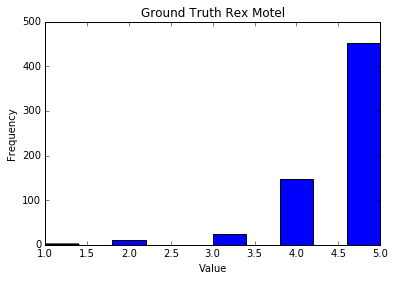

In [182]:
plt.hist(finaldf.loc[finaldf['hotelName'] == 'The Rex Motel']['ratingScore'].as_matrix())
plt.title("Ground Truth Rex Motel")
plt.xlabel("Value")
plt.ylabel("Frequency")
fig = plt.gcf()

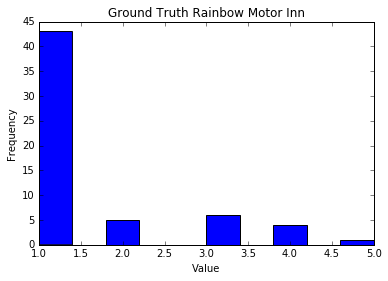

In [185]:
plt.hist(finaldf.loc[finaldf['hotelName'] == 'Rainbow Motor Inn']['ratingScore'].as_matrix())
plt.title("Ground Truth Rainbow Motor Inn")
plt.xlabel("Value")
plt.ylabel("Frequency")
fig = plt.gcf()

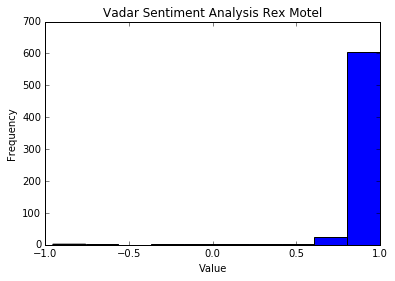

In [188]:
plt.hist(finaldf.loc[finaldf['hotelName'] == 'The Rex Motel']['vader'].as_matrix())
plt.title("Vadar Sentiment Analysis Rex Motel")
plt.xlabel("Value")
plt.ylabel("Frequency")
fig = plt.gcf()

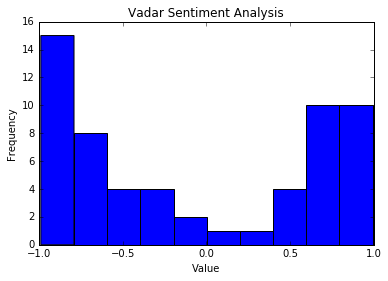

In [187]:
plt.hist(finaldf.loc[finaldf['hotelName'] == 'Rainbow Motor Inn']['vader'].as_matrix())
plt.title("Vadar Sentiment Analysis Rainbow Motor Inn")
plt.xlabel("Value")
plt.ylabel("Frequency")
fig = plt.gcf()

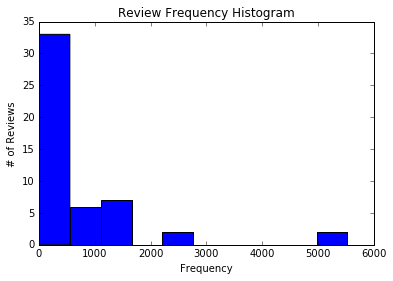

In [65]:
countlists = []
for hotel in hotelNames:
    countlists.append(finaldf.loc[finaldf['hotelName']==hotel].shape[0])
#xfiller = [i for i in range(len(hotelNames.tolist()))]
#plt.xticks(xfiller, hotelNames.tolist())
#plt.bar(xfiller, countlists, align='center')
plt.hist(countlists)
plt.title("Review Frequency Histogram")
plt.xlabel("Frequency")
plt.ylabel("# of Reviews")
fig = plt.gcf()

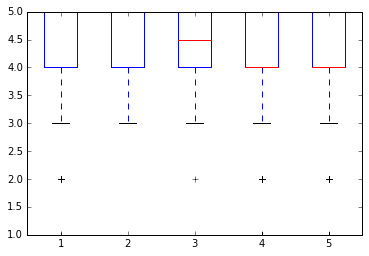

In [78]:
#Plot top 5 side-by-side boxplot for top 5 ground truth rated hotel
tp5gthotel = hotelRatingDfGt.sort_values('avgRatingScore',ascending=0).head(5)
tp5gthotel['hotelName'].as_matrix()

rex = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].as_matrix()[0]]['ratingScore']
rainbow = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].as_matrix()[1]]['ratingScore']
parkway = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].as_matrix()[2]]['ratingScore']
niagara = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].as_matrix()[3]]['ratingScore']
rodeway = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].as_matrix()[4]]['ratingScore']

data = [rex, rainbow, parkway, niagara, rodeway]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)
plt.show()

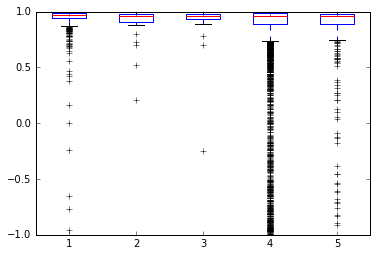

In [79]:
#Plot top 5 side-by-side boxplot for top 5 ground truth rated hotel
tp5gthotel = hotelRatingDfGt.sort_values('avgRatingScore',ascending=0).head(5)
tp5gthotel['hotelName'].as_matrix()

pilgrim = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].as_matrix()[0]]['vader']
rex1 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].as_matrix()[1]]['vader']
rainbow1 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].as_matrix()[2]]['vader']
parkway1 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].as_matrix()[3]]['vader']
space = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].as_matrix()[4]]['vader']

data1 = [pilgrim, rex1, rainbow1, parkway1, space]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data1)
plt.show()

In [82]:
print("rex motel: ", np.mean(rex))
print(np.var(rex))
print("rainbow hotel: ", np.mean(rainbow))
print(np.var(rainbow))
print("parkway hotel: ", np.mean(parkway))
print(np.var(parkway))
print("niagara hotel: ", np.mean(niagara))
print(np.var(niagara))
print("rodeway: ", np.mean(rodeway))
print(np.var(rodeway))
print("pilgrim: ",np.mean( pilgrim))
print(np.var(pilgrim))
print("rex motel: ", np.mean(rex1))
print(np.var(rex1))
print("rainbow hotel: ", np.mean(rainbow1))
print(np.var(rainbow1))
print("parkway hotel: ", np.mean(parkway1))
print(np.var(parkway1))
print("space hotel: ", np.mean(space))
print(np.var(space))

rex motel:  4.62539184953
0.453712620749
rainbow hotel:  4.47058823529
0.484429065744
parkway hotel:  4.3125
0.71484375
niagara hotel:  4.23216226005
0.94066787081
rodeway:  4.18475750577
0.843462816485
pilgrim:  0.934576332288
0.0240554996749
rex motel:  0.903308823529
0.0244369566869
rainbow hotel:  0.86209375
0.0886359805859
parkway hotel:  0.81951754799
0.154151791686
space hotel:  0.840665127021
0.114075581532


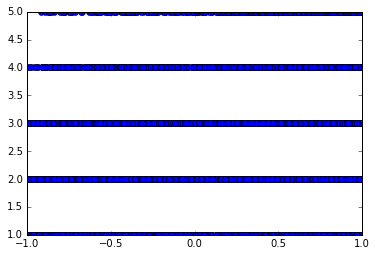

In [112]:
y = finaldf['ratingScore'].as_matrix()
x = finaldf['vader'].as_matrix()
plt.plot(x, y,"o")

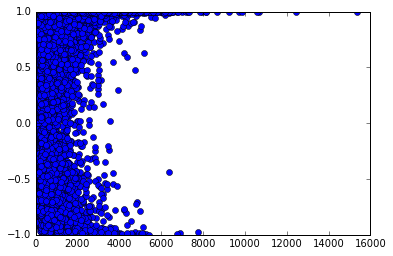

In [124]:
newlist = [len(i) for i in hotelDf['reviewColumn']]
x = newlist
y = finaldf['vader'].as_matrix()
plt.plot(x, y,"o")

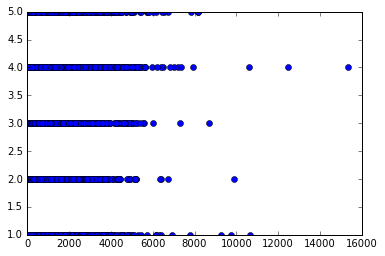

In [125]:
newlist = [len(i) for i in hotelDf['reviewColumn']]
x = newlist
y = finaldf['ratingScore'].as_matrix()
plt.plot(x, y,"o")

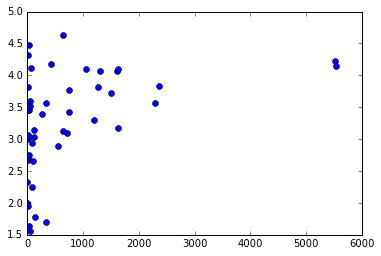

In [128]:
newlist = [len(i) for i in hotelDf['reviewColumn']]
x = countlists
y = hotelRatingDfGt['avgRatingScore'].as_matrix()
plt.plot(x, y,"o")

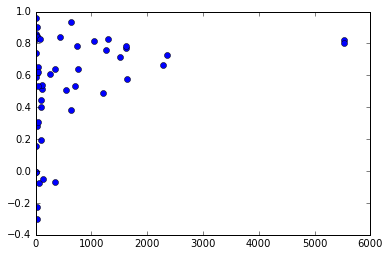

In [129]:
newlist = [len(i) for i in hotelDf['reviewColumn']]
x = countlists
y = hotelRatingDfVd['avgVaderScore'].as_matrix()
plt.plot(x, y,"o")